In [5]:
### PYCARET
### Base de Fraude
import pandas as pd
fr = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/Fraud_Study_Enrich.csv")
### Citar aqui Missing Values

# Imputation
#fr[['SCORE2']].fillna(0)
fr[['SCORE2']]

# Cat
fr[['ESCOLARIDADE']].mode()



,ESCOLARIDADE
0,"COLEGIAL COMPLETO, OU MEDIO COMPLETO"


In [ ]:
### SCALING

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")
df.plot.scatter(x='wt', y='mpg')
# Tratamento de dados - normalização/ajuste de escala
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

# Execução do K-Means - random_state => define uma semente para geração dos K centróides iniciais em posições aleatórias
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01', 'wt01']])

df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

In [2]:
### SCALING LOG
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/db_Exercicio_RFM.csv")

In [21]:
DFagg = df.groupby(by=["CUSTOMER_ID"])['AMOUNT'].agg(['sum','count'])

<Axes: xlabel='sum', ylabel='count'>

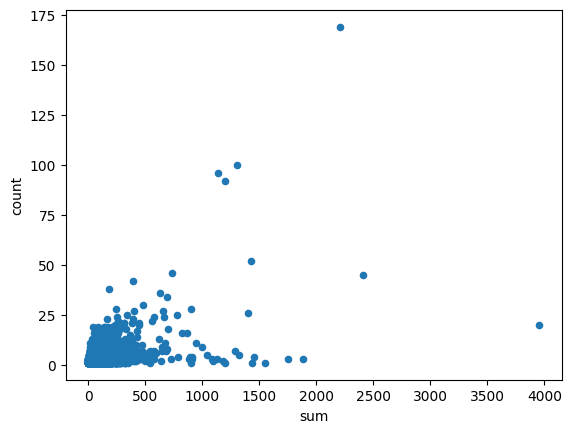

In [24]:
DFagg.plot.scatter(x='sum',
                      y='count')

array([[<Axes: title={'center': 'count'}>]], dtype=object)

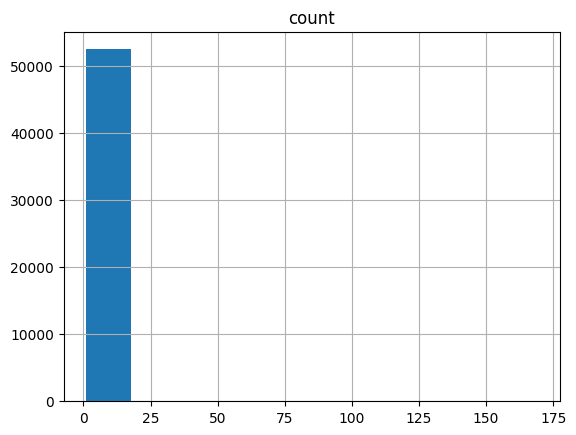

In [26]:
DFagg.hist('count')

array([[<Axes: title={'center': 'logcount'}>]], dtype=object)

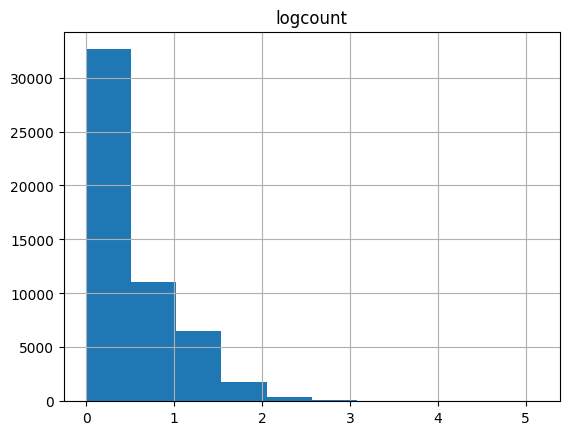

In [33]:
import numpy as np
DFagg['logcount'] = np.log(DFagg['count'])
DFagg.hist('logcount')

In [79]:
## DISCRETIZATION

# Percentis
# Cálculo de percentis ou decis
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv")
df[['price']].quantile( np.arange(0,1,0.1) ) # Quantis de intervalo 10% (0,1)  entre 0 e 1

# Cut
bin = [0,1000,3000,9000, 50000]
labels = ['1','2','3','4']
pd.cut(df['price'], bins=bin, labels=labels)

0        1
1        1
2        1
3        1
4        1
        ..
53935    2
53936    2
53937    2
53938    2
53939    2
Name: price, Length: 53940, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [ ]:
## ENCODING
## Dummies
#titanic

## Feature Crossing



In [83]:
# 0. Carga de bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split   # geração de amostras aleatórias para treino e teste
from sklearn.metrics import accuracy_score             # métrica de erro de classificadores chamada acurácia
from sklearn.metrics import precision_score             # métrica de erro de classificadores chamada precision
from sklearn.metrics import recall_score             # métrica de erro de classificadores chamada recall

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

dfTit = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv")

# Criação da variável Dummy para Gênero
dummies_sex = pd.get_dummies(dfTit['Sex'])
dfTit['SexFemale'] = dummies_sex['female']
# Criação da variável Dummy para Classe
dummies_pclass = pd.get_dummies(dfTit['Pclass'], prefix='c')
dfTit['Pclass1'] = dummies_pclass['c_1']
dfTit['Pclass2'] = dummies_pclass['c_2']
# Tratamento de dados - preenchimento de idades nulas
ageMed = dfTit['Age'].mean()
dfTit['Age'] = dfTit['Age'].fillna(ageMed)

# Separação de nova base de treino e teste, a partir do train.csv
x_treino, x_teste, y_treino, y_teste = train_test_split(dfTit[['SexFemale','Pclass1','Pclass2','Age']] , dfTit['Survived'], test_size=0.25, random_state=1)

# Modelo de Árvores de Decisão
# modTit = tree.DecisionTreeClassifier()

# Algoritmo RandomForest
modTit = RandomForestClassifier(n_estimators=10000, random_state=1)


modTit.fit(x_treino, y_treino)


# Previsão em teste
y_prev = modTit.predict(x_teste)

# Acurácia
print(accuracy_score(y_teste, y_prev))
# Precision
print(precision_score(y_teste, y_prev))
# Recall
print(recall_score(y_teste, y_prev))
# Matriz de confusão
pd.crosstab(y_prev, y_teste, margins=True)

0.7847533632286996
0.7974683544303798
0.6631578947368421


Survived,0,1,All
row_0,,,
0,112,32,144
1,16,63,79
All,128,95,223


In [84]:
## Feature importance
import numpy as np

importances = modTit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(x_treino.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))



 1) clarity                        0.460396
 2) carat                          0.376549
 3) cut                            0.101098
 4) color                          0.061958


In [ ]:
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [82]:
### ALL VARIABLES
ndf = df.std()
ndf[0]

id =1

for i in ndf:
  #print(i)
  nc = 'std_'+ndf.index[id-1]
  df[nc]=i
  id = id+1

<ipython-input-82-842aff72c634>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ndf = df.std()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,strUnnamed: 0,strcarat,strdepth,strtable,strprice,strx,stry,strz
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699


In [38]:

pib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")

In [41]:
# Moving Average
pib[['PIB']].rolling(2).mean()

,PIB
0,NaN
1,102.570
2,106.240
3,108.600
4,107.425
...,...
133,146.965
134,148.050
135,149.355
136,147.985
